# Import data

In [14]:
import string
from nltk.stem.porter import *

stemmer = PorterStemmer()

def simple_tokenize(s):
    """where s is a string of text, raw poem"""
    s = s.lower()
    s = s.translate(str.maketrans('', '', string.punctuation))
    return s.split(" ")

def get_stems(s):
    """where s is a list of lowercase words"""
    return [stemmer.stem(w) for w in s]


data_raw = []
data_tokens = []
data_stems = []

# first add part a
with open("part_a.txt", "r") as fle:
    for line in fle:
        if line[0] == "[":
            text = line.split("]")[1].strip()
            data_raw.append(text)

            tokens = simple_tokenize(text)
            data_tokens.append(tokens)

            stems = get_stems(tokens)
            data_stems.append(stems)

# cut it to just 100 poems (easier later)
data_raw = data_raw[:100]
data_tokens = data_tokens[:100]
data_stems = data_stems[:100]

poems_a = list(range(len(data_raw)))
            
# then add part b
with open("part_b.txt", "r") as fle:
    for line in fle:
        if line[0] == "[":
            text = line.split("]")[1].strip()
            data_raw.append(text)

            tokens = simple_tokenize(text)
            data_tokens.append(tokens)

            stems = get_stems(tokens)
            data_stems.append(stems)

data_raw = data_raw[:200]
data_tokens = data_tokens[:200]
data_stems = data_stems[:200]            

poems_b = list(range(poems_a[-1]+1, len(data_raw)))

split_index = poems_a[-1]

print(poems_a)
print(poems_b)
print(split_index)
data_raw[0], ' '.join(data_tokens[0]), ' '.join(data_stems[0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
99


('I visualize two paths my life might take. The one where I have a child and the one where I do not. I try to place them on equal footing, imagining each as something I truly want. Though I know both will be filled with disappointment and loss.',
 'i visualize two paths my life might take the one where i have a child and the one where i do not i try to place them on equal footing imagining each as something i truly want though i know both will be filled with disappointment and loss',
 'i visual two path my life might take the one where i have a child and the one where i do not i tri to place them on equal foot imagin each as someth i truli want though i know both will be fill with disappoint and loss')

# Calculate transition scores

i.e. How well one poem flows into another. 

Look at the 10 words at the end of one poem, the ten at the start of the next. High score is better, but then we'll invert it so that score is more like distance.

Initial score: 0

If a word in poem B is in poem A (check for stemmed matches also):

* If not a stop word:
    * +10 if exact word match OR
    * +5 if stemmed word match
* If narrow stop word:
    * +2
* If broad stop word
    * +4
    
Not implemented: 

* Check number of words between them (k) -- could be up to 18
    * -k/4


In [15]:
stopwords_broad = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
stopwords_narrow = ["the", "a", "an"]

def join_score(a, b, n=10):
    """where a and b are indices for the data, and n is num of words to consider"""
    score = 0
    a_tokens = data_tokens[a]
    a_stems = data_stems[a]
    b_tokens = data_tokens[b]
    b_stems = data_stems[b]
    for i in range(min(len(a_tokens), n)): # iterate over words in a
        a_token = a_tokens[-i]
        a_stem = a_stems[-i]
        for j in range(min(len(b_tokens), n)): # iterate over words in b
            b_token = b_tokens[j]
            b_stem = b_stems[j]
            if a_token == b_token: # if there's a matching word
                if a_token in stopwords_narrow:
                    score += 2
                    continue
                if a_token in stopwords_broad:
                    score += 4
                    continue
                score += 10
                continue
            if a_stem == b_stem:
                score += 5
    return 20 - score

p = 2
q = 3
print(data_raw[p])
print(data_raw[q])
join_score(p, q)

A mood sweeps in like a fog. I no longer know where it came from. I get stuck in circles. I try to ignore the suspense; anger and hurt can do that well, but not entirely. Suspense is lodged within me, someplace deep. The fog crawls at my feet. Let me stay, it mews, and though I definitely want it to leave, it doesn’t feel entirely up to me.
I pause to look carefully at the book cover. I am obsessed with the way books feel, how they look: their aspect ratio, the texture of the paper. If I put my nose close, I can see the dot matrix of the printed artwork. It’s not grey; it’s white with a multitude of black dots. The blue is more difficult to parse. Blue and purple and white?


12

In [16]:
import numpy as np

def calc_all_scores(data, join_score_func):
    scores = np.empty([len(data), len(data)])
    for i in range(len(data)):
        for j in range(len(data)):
            if i == j:
                s = np.nan
            else:
                s = join_score_func(i, j)
            scores[i][j] = s
    return scores

In [17]:
scores = calc_all_scores(data_raw, join_score)

In [18]:
scores

array([[nan,  2., 16., ..., 20., 16., 16.],
       [12., nan, 16., ..., 12., 12.,  8.],
       [20., 12., nan, ...,  0., 20., 12.],
       ...,
       [20., 12., 20., ..., nan, 20., 16.],
       [12., 12., 16., ..., 20., nan, 16.],
       [16.,  8., 16., ..., 16., 16., nan]])

# Get poems that fit together best

This is just to check that the join scores are working okay.

In [19]:
def get_top_scores(scores, asc=True, n=5):
    flattened = scores.flatten()
    if asc:
        sorted_indices = np.argsort(flattened)
    else:
        sorted_indices = np.argsort(-flattened)
    indices_2d = np.unravel_index(sorted_indices, scores.shape)
    sorted_indices_list = list(zip(indices_2d[0], indices_2d[1]))
    
    for i, val in enumerate(sorted_indices_list[0:n]):
        print('indices:', val)
        print('score:', scores[val[0],val[1]])
        print('>>>', data_raw[val[0]], '\n>>>>', data_raw[val[1]], '\n')

    return sorted_indices_list

In [20]:
x = get_top_scores(scores, asc=True, n=10)

indices: (118, 94)
score: -26.0
>>> Alright, let's try to do some automatic writing, let the words come out, worry not again or about their content, just let it go let it go see or seem if they go somewhere but don't want them to or expect them to or even need them to, just list out the letters of the alphabet, just repeat the word fraught over and over again fraught fraught fraught or trail mix or water bottle or peppermint tea or macbook air or the ceramic cup I got at my brother's wedding and think about the job offer I am sitting on and whether I will move and think about living with my parents and the way my mum takes the baby to meetings and the way the dogs bark at each other and the way the light comes in but not as much as I would like and the way the weather remains bad even now into April when I desperately need to be free of winter and think of the child I made and how this technically makes me a mother but how I don't feel like a mother I feel like a human and how I expect

# Find 'best' mixed path

## A single tour

This is a traveling salesman problem with assymetric distances. I'm going to use a Markov Chain Monte Carlo method to stochastically find a good path. The basic idea is to start with a random path, and then randomly swap "cities" and check if the new path is better; then we repeat this many times. However, to avoid local minimums, we add some wiggle room for selecting a slightly less optimal path. We'll add in simulated annealing, which means we'll decrease the wiggle room as we go on.

To keep in line with traveling salesman terminology, each poem is called 'city', and the ordering of the poems is called the 'tour'. The scores between poems are 'distances'.

Shouldn't take more than a second or two to run with 50k iterations.

## A double tour

Actually, I have two tours: the cities (poems) of part A, and the cities (poems) or part B. Both should be optimal. 

I'd like to be able to create mixtures of part A and part B. To do this, I set a mixture percentage, and then randomly swap that percentage of cities. So let's say the percentage is 30%. I randomly select 30% of cities from part A and swap it with 30% from part B. Let's imagine cities have colors, and those colors represent which part they originally come from. So originally we have blue cities in part A and red cities in part B. Now part A is mostly blue, but with some red, and part B is mostly red, but with some blue.

Then we do MCMC on the tour like usual, but with a constraint on how cities can be swapped. Normally, with a single tour, you can swap any city with any other. Now a city can be swapped with:

* any other city in the same part (e.g. if from part A, it can be swapped with any other city in part A)
* any other city with the same color (e.g. if blue, it can be swapped with any other blue city)

This means that, e.g., a blue city in part A can be swapped with any city in part A (red or blue) or any blue city (in part A or part B). 

The idea here is that by allowing swaps into the other part, but of the same color, we can mix up the cities between the parts *without changing the mixture percentage*. 

Now, when we decide if we want to keep a swap, we want to calculate the distance of each tour independently (the tour through part A and the tour through part B) and then only accept a swap if *both* tours improve.

## Some pseudocode

This can be implemented basically the same way, but now the tour contains part A and part B (let's consider them really to be tour A and tour B) and we need to keep track of the split index -- the index of the last city in tour A. Then, the only difference is:

* constraints on the kinds of swaps that are allowed
* extra constraint on when to keep a swap (calculate two tour distances; both must improve)

In [52]:
# uses the following variables from above:
# poems_a, poems_b, split_index

import random
import math

def calculate_total_distance(tour, distance_matrix):
    return sum(distance_matrix[tour[i]][tour[i+1]] for i in range(len(tour)-1))

def swap_cities(tour):
    new_tour = tour[:]
    # old way: can swap any two cities
#     i, j = random.sample(range(len(tour)), 2)
    # new way: randomly select one city, then constraint second swap
    [(i, city)] = random.sample(list(enumerate(tour)), 1) # i is location in tour, city is index of city
    if city in poems_a: # if city is from original A set
        if i <= split_index: # if city is in tour A
            acceptable_swaps = tour[:split_index] + [c for c in tour[split_index:] if c in poems_a]
        else: # if city is in tour B
            acceptable_swaps = tour[split_index:] + [c for c in tour[split_index:] if c in poems_a]
    else: # if city is from original B set
        if i <= split_index: # if city is in tour A
            acceptable_swaps = tour[:split_index] + [c for c in tour[split_index:] if c in poems_b]
        else: # if city is in tour B
            acceptable_swaps = tour[split_index:] + [c for c in tour[split_index:] if c in poems_b]
    # sample from acceptable_swaps, then find index of that sample in current tour
    j = tour.index(random.sample(acceptable_swaps, 1)[0])
    
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
    return new_tour

def solver(distance_matrix, iterations, initial_temperature, mixture):
    # mixture should be an int between 1 and 50
    tour_a = poems_b[:mixture] + poems_a[mixture:]
    tour_b = poems_a[:mixture] + poems_b[mixture:]
    
    current_tour = tour_a + tour_b
    
    current_distance_a = calculate_total_distance(tour_a, distance_matrix)
    current_distance_b = calculate_total_distance(tour_b, distance_matrix)
    
    best_tour = current_tour
    best_distance_a = current_distance_a
    best_distance_b = current_distance_b

    temperature = initial_temperature

    down_sample = 100
    
    distance_array_a = np.empty(int(iterations/down_sample))
    distance_array_b = np.empty(int(iterations/down_sample))

    for iteration in range(iterations):
        if iteration%down_sample == 0:
            distance_array_a[int(iteration/down_sample)] = current_distance_a
            distance_array_b[int(iteration/down_sample)] = current_distance_b
            
        new_tour = swap_cities(current_tour)
        
        new_distance_a = calculate_total_distance(new_tour[:split_index], distance_matrix)
        new_distance_b = calculate_total_distance(new_tour[split_index:], distance_matrix)
        
        delta_distance_a = new_distance_a - current_distance_a
        delta_distance_b = new_distance_b - current_distance_b

        if delta_distance_a < 0 or random.random() < math.exp(-delta_distance_a / temperature):
            if delta_distance_b < 0 or random.random() < math.exp(-delta_distance_b / temperature):
                current_tour = new_tour
                current_distance_a = new_distance_a
                current_distance_b = new_distance_b
                
                if new_distance_a < best_distance_a and new_distance_b < best_distance_b:
                    best_tour = new_tour
                    best_distance_a = new_distance_a
                    best_distance_b = new_distance_b

        temperature *= 0.999  # Cooling schedule

    return best_tour, best_distance_a, best_distance_b, distance_array_a, distance_array_b

# Example usage
cities = list(range(len(data_raw)))  # Example cities
distance_matrix = scores  # Your asymmetric distance matrix
iterations = 50000
initial_temperature = 100
mixture = 2

best_tour, best_dist_a, best_dist_b, dist_arr_a, dist_arr_b = solver(distance_matrix, iterations, initial_temperature, mixture)
print("Best Tour:", best_tour)
print("Best Distance:", best_dist_a, best_dist_b)

Best Tour: [146, 39, 48, 9, 17, 25, 82, 129, 83, 55, 53, 40, 98, 96, 78, 26, 11, 50, 3, 7, 73, 56, 97, 67, 12, 1, 94, 77, 90, 84, 95, 24, 49, 31, 61, 63, 35, 19, 79, 80, 13, 47, 75, 42, 45, 81, 28, 64, 74, 15, 16, 69, 33, 6, 21, 36, 29, 99, 144, 68, 52, 72, 18, 46, 43, 86, 65, 93, 62, 76, 89, 88, 87, 85, 66, 71, 0, 70, 27, 10, 20, 135, 2, 60, 30, 41, 22, 23, 51, 4, 59, 37, 92, 38, 58, 57, 14, 5, 8, 91, 161, 195, 191, 136, 166, 112, 126, 121, 145, 138, 157, 32, 156, 34, 125, 170, 190, 108, 131, 107, 165, 147, 117, 171, 115, 104, 163, 162, 100, 178, 111, 168, 113, 137, 128, 140, 160, 109, 114, 149, 193, 192, 134, 102, 155, 101, 183, 180, 174, 177, 105, 185, 198, 188, 199, 141, 150, 179, 127, 173, 172, 194, 159, 142, 175, 152, 123, 184, 116, 186, 167, 196, 54, 118, 151, 44, 169, 164, 189, 187, 122, 133, 110, 124, 119, 148, 158, 176, 103, 130, 120, 197, 181, 153, 182, 106, 154, 132, 143, 139]
Best Distance: 582.0 625.0


# Let's see how well the solver is working

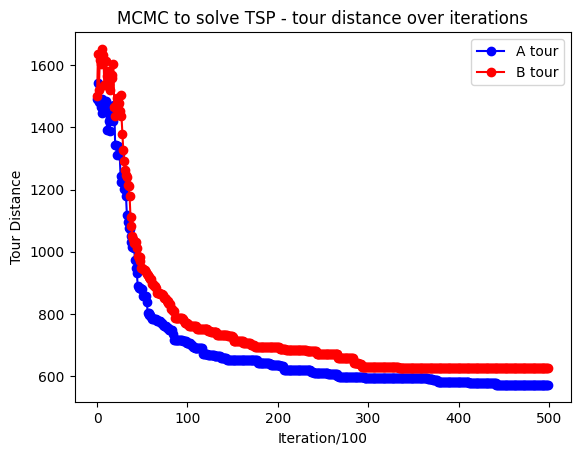

In [53]:
import matplotlib.pyplot as plt

# Generate x-axis values (indices of the array)
indices = np.arange(len(dist_arr_a))

# Create a line plot
plt.plot(indices, dist_arr_a, c='b', marker='o')
plt.plot(indices, dist_arr_b, c='r', marker='o')
plt.legend(["A tour", "B tour"])

# Add titles and labels
plt.title('MCMC to solve TSP - tour distance over iterations')
plt.xlabel('Iteration/100')
plt.ylabel('Tour Distance')

# Show the plot
plt.show()


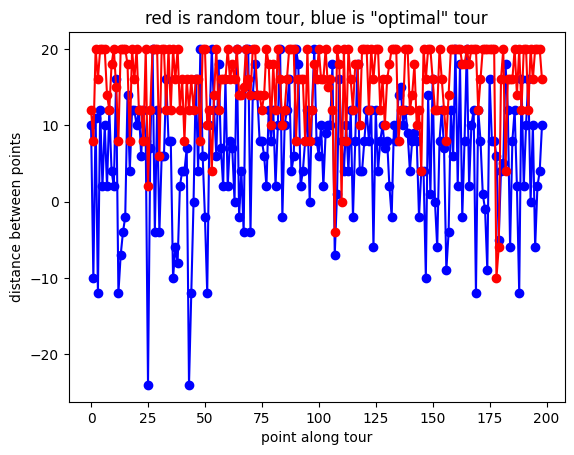

In [54]:
def get_tour_scores(tour):
    score_list = []
    for i in range(len(tour)-1):
        score_list.append(scores[tour[i], tour[i+1]])
    return score_list

random_tour = random.sample(list(range(len(data_raw))), len(data_raw))

best_score_list = get_tour_scores(best_tour)
rand_score_list = get_tour_scores(random_tour)

indices = np.arange(len(best_score_list))

# Create a line plot
plt.plot(indices, best_score_list, c='b', marker='o')
plt.plot(indices, rand_score_list, c='r', marker='o')

# Add titles and labels
plt.title('red is random tour, blue is "optimal" tour')
plt.xlabel('point along tour')
plt.ylabel('distance between points')

# Show the plot
plt.show()

# Now let's check that the two tours are split correctly

In [58]:
tour_a = best_tour[:100]
tour_b = best_tour[100:]

print("B poems in tour A:", len([p for p in tour_a if p in poems_b]))
print("A poems in tour A:", len([p for p in tour_a if p in poems_a]))
print('\n')
print("A poems in tour B:", len([p for p in tour_b if p in poems_a]))
print("B poems in tour B:", len([p for p in tour_b if p in poems_b]))


B poems in tour A: 4
A poems in tour A: 96


A poems in tour B: 4
B poems in tour B: 96


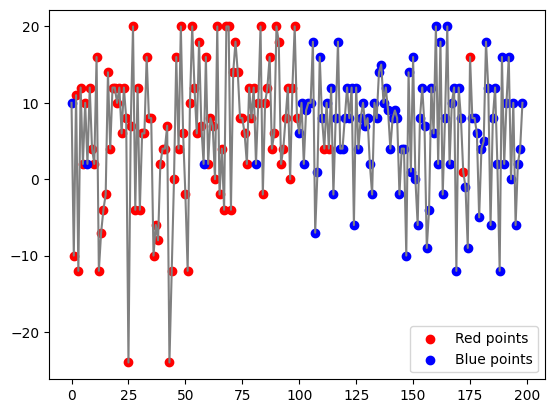

In [56]:
indices = np.arange(len(best_tour[:199]))

indices_a = [i for i,p in enumerate(best_tour[:199]) if p in poems_a]
indices_b = [i for i,p in enumerate(best_tour[:199]) if p in poems_b]

# Plotting the line connecting all points
plt.plot(indices, best_score_list, linestyle='-', color='gray')  # Use any color for the line

# Plotting red points
plt.scatter([indices[i] for i in indices_a], [best_score_list[i] for i in indices_a], color='red', label='Red points')

# Plotting blue points
plt.scatter([indices[i] for i in indices_b], [best_score_list[i] for i in indices_b], color='blue', label='Blue points')

# Optional: Adding a legend
plt.legend()

# Show the plot
plt.show()